In [168]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [169]:
df = pd.read_csv("HealthCareProject.csv")

print(df.head())
print("*"*70)
print(df.columns)
print("*"*70)
print(df.info())
print("*"*70)

  Unnamed: 0  v1  v2   v3  v4  v5  v6  v7  v8  v9  v10  v11  v12  v13
0     METype   1   1  1.0   1   1   1   1   1   1    2    2    1    3
1         C1  32   2  3.5   3   1   1   2   1   5    2    3    2    1
2         C2  42   1  3.5   3   1   1   1   2   3    2    3    2    3
3         C3  29   2  3.5   2   1   1   1   2   8    7    8    2    1
4         C4  23   1  3.0   3   1   1   1   2  15    9    9    2    1
**********************************************************************
Index(['Unnamed: 0', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9',
       'v10', 'v11', 'v12', 'v13'],
      dtype='object')
**********************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  225 non-null    object 
 1   v1          225 non-null    int64  
 2   v2          225 non-null    int

In [170]:
# Drop specified columns AND first row in one chain
df = df.drop(columns=['Unnamed: 0']).drop(index=0).reset_index(drop=True)

# Replace 999 placeholders with NaN and fill them
df.replace(999, np.nan, inplace=True)
df.fillna(method='ffill', inplace=True)

# Convert all columns to integers
df = df.astype(int)


In [171]:
df.head()
# v1 - Age
# v2 - Classifier - Primary, secondary i.e., sterility. 
# v3 - Years before pregnancy(Years after marriage) (Duration of infertility). Does it mean that the patient facing the problem of non-pregnancy since v3?
# v4 - Classifier - factor of non-children because of male or female or both
# v5 - Classifier - whom we are using, self or donated by others female
# v6 - Classifier - male sperm (self or other persons or combination of both)
# v7 - classifier - method to activate sperms, stimulation
# v8--  how we got sperms 4 to 5 methods, example masturbation, etc. --- outcome classifier.
# v9 - Categorical number - No of eggs.
# v10 - Predictive Outcomes - classifier - no of eggs formed - Intermediate outcomes - How many eggs formed 
# v11 - Predictive outcomes - classifier - How many eggs got converted to embryosss
# v12 - Does it come under input variable in first tier or second tier. Immediately or after frozen
# v13 – Pregnant (Yes/No)


,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13
0,32,2,3,3,1,1,2,1,5,2,3,2,1
1,42,1,3,3,1,1,1,2,3,2,3,2,3
2,29,2,3,2,1,1,1,2,8,7,8,2,1
3,23,1,3,3,1,1,1,2,15,9,9,2,1
4,22,1,5,3,1,1,1,1,5,3,3,2,3


v1 - age not touching it ML works good with continous data 
v2 and v3 are also good 
v4 - (1,2,3,4) 4 is unknow sus lets drop  it


In [172]:
classfierCol = ['v1','v3', 'v9', 'v10', 'v11']

for col in df.columns:
    if col not in classfierCol:
        print(f"\n value counts \n {df[col].value_counts()} \n")



 value counts 
 v2
1    147
2     77
Name: count, dtype: int64 


 value counts 
 v4
3    167
2     42
1      9
4      6
Name: count, dtype: int64 


 value counts 
 v5
1    174
2     50
Name: count, dtype: int64 


 value counts 
 v6
1    198
2     19
3      7
Name: count, dtype: int64 


 value counts 
 v7
1    216
2      8
Name: count, dtype: int64 


 value counts 
 v8
1    120
2     46
3     35
4     21
5      2
Name: count, dtype: int64 


 value counts 
 v12
2    199
1     25
Name: count, dtype: int64 


 value counts 
 v13
3    147
1     69
2      8
Name: count, dtype: int64 



In [173]:
# Drop rows where v4 is 4 (unknown/miscoded)
df = df[df['v4'] != 4]

# Optional: reset index afterward
df = df.reset_index(drop=True)


v8 = 5 check out other output
only with 2 entry i decided to drop it 


In [174]:

# Drop rows where v8 == 5
df = df[df['v8'] != 5]

# Optional: reset index
df = df.reset_index(drop=True)



In [175]:

df = df[df['v13'] != 2].reset_index(drop=True)

# Remap target: 1 → 0 (Pregnant), 3 → 1 (Not Pregnant)
df['v13'] = df['v13'].map({1: 0, 3: 1})

In [176]:
skip_cols = ['v1', 'v3', 'v9', 'v11']

for col in df.columns:
    if col not in skip_cols:
        print(f"\nValue counts for {col}:\n")
        print(df[col].value_counts())



Value counts for v2:

v2
1    137
2     71
Name: count, dtype: int64

Value counts for v4:

v4
3    159
2     40
1      9
Name: count, dtype: int64

Value counts for v5:

v5
1    161
2     47
Name: count, dtype: int64

Value counts for v6:

v6
1    182
2     19
3      7
Name: count, dtype: int64

Value counts for v7:

v7
1    201
2      7
Name: count, dtype: int64

Value counts for v8:

v8
1    113
2     43
3     31
4     21
Name: count, dtype: int64

Value counts for v10:

v10
6     26
2     21
7     21
4     21
8     18
3     18
5     16
9     16
11    11
10    10
1      9
17     6
13     5
14     3
12     3
15     2
16     1
0      1
Name: count, dtype: int64

Value counts for v12:

v12
2    184
1     24
Name: count, dtype: int64

Value counts for v13:

v13
1    140
0     68
Name: count, dtype: int64


In [177]:
from sklearn.utils import resample
import pandas as pd

# Column(s) to boost minority classes
columns_to_boost = ['v4','v6','v7','v8','v12']  # for example
boost_count = 70  # how many rows to add per minority class

# Copy original
boosted_df = df.copy()

# Loop through each column
for col in columns_to_boost:
    print(f" Boosting column: {col}")
    
    counts = boosted_df[col].value_counts()
    resampled_subsets = []

    for cat_value, count in counts.items():
        subset = boosted_df[boosted_df[col] == cat_value]

        if count < counts.max():  # Only boost minority classes
            upsampled = resample(
                subset,
                replace=True,
                n_samples=boost_count,
                random_state=42
            )
            resampled_subsets.append(upsampled)

    # Only append the new upsampled data (don’t duplicate originals)
    boosted_df = pd.concat([boosted_df] + resampled_subsets, ignore_index=True)

# Shuffle and reset index
boosted_df = boosted_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Replace df
df = boosted_df.copy()


print("New shape:", df.shape)


 Boosting column: v4
 Boosting column: v6
 Boosting column: v7
 Boosting column: v8
 Boosting column: v12
New shape: (838, 13)


In [178]:
skip_cols = ['v1', 'v3', 'v9', 'v10','v11']

for col in df.columns:
    if col not in skip_cols:
        print(f"\nValue counts for {col}:\n")
        print(df[col].value_counts())



Value counts for v2:

v2
1    604
2    234
Name: count, dtype: int64

Value counts for v4:

v4
3    340
2    287
1    211
Name: count, dtype: int64

Value counts for v5:

v5
1    660
2    178
Name: count, dtype: int64

Value counts for v6:

v6
1    520
2    182
3    136
Name: count, dtype: int64

Value counts for v7:

v7
1    720
2    118
Name: count, dtype: int64

Value counts for v8:

v8
1    299
4    195
2    184
3    160
Name: count, dtype: int64

Value counts for v12:

v12
2    666
1    172
Name: count, dtype: int64

Value counts for v13:

v13
1    611
0    227
Name: count, dtype: int64


In [184]:
print(df.isnull().sum())
print(df.shape)


v1     0
v2     0
v3     0
v4     0
v5     0
v6     0
v7     0
v8     0
v9     0
v10    0
v11    0
v12    0
v13    0
dtype: int64
(838, 13)


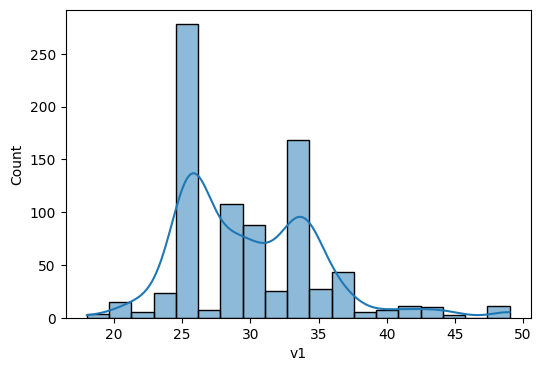

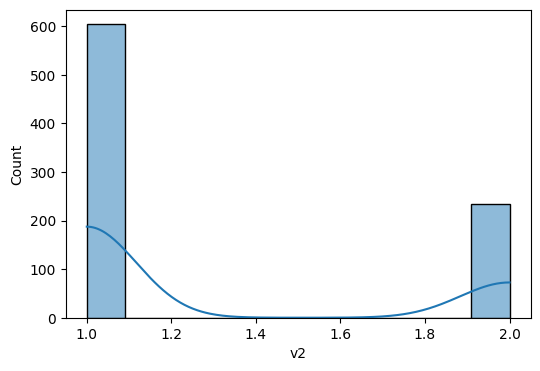

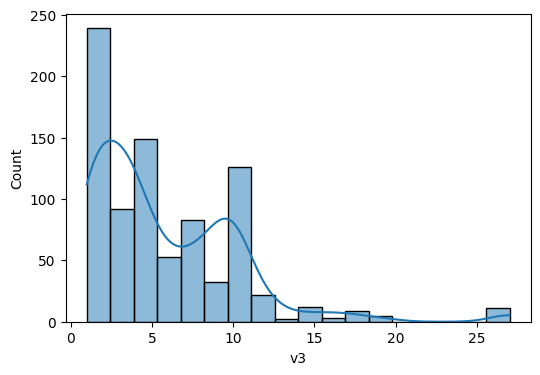

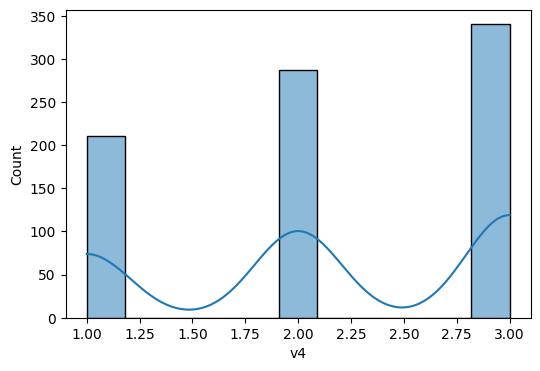

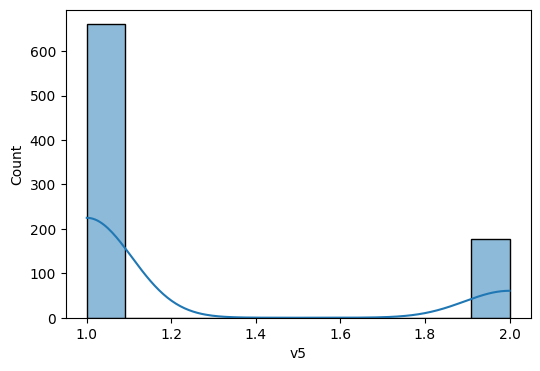

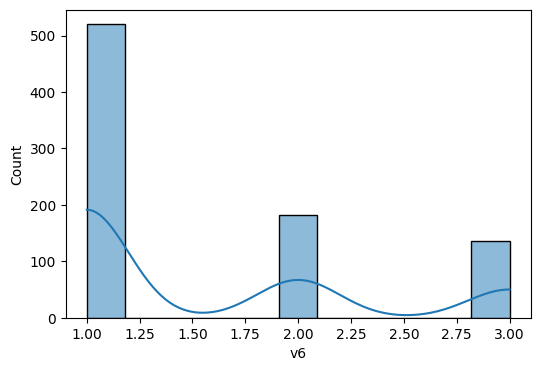

In [ ]:
for col in df.columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde = True)
    plt.show()

In [181]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [186]:
from sklearn.model_selection import train_test_split

# Create train/test split (80/20 split)
x_train, x_test, y_train, y_test = train_test_split(
    x, y,
    test_size=0.2,
    stratify=y,          # preserves class balance in target
    random_state=42      # for reproducibility
)

# Confirm shapes
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("x_train shape:", y_train.shape)
print("x_test shape:", y_test.shape)
print("y_train class distribution:\n", y_train.value_counts())
print("y_test class distribution:\n", y_test.value_counts())

x_train shape: (670, 12)
x_test shape: (168, 12)
x_train shape: (670,)
x_test shape: (168,)
y_train class distribution:
 v13
1    489
0    181
Name: count, dtype: int64
y_test class distribution:
 v13
1    122
0     46
Name: count, dtype: int64


In [183]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


# STEP 2: Train RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train, y_train)

# STEP 3: Predict and evaluate
y_pred = rf.predict(x_test)

print(rf.score(x_test, y_test)* 100)
print(rf.score(x_train, y_train)*100)

# STEP 4: Print results
print("🔍 Classification Report:\n", classification_report(y_test, y_pred))
print("📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


86.30952380952381
93.73134328358209
🔍 Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.74      0.75        46
           1       0.90      0.91      0.91       122

    accuracy                           0.86       168
   macro avg       0.83      0.82      0.83       168
weighted avg       0.86      0.86      0.86       168

📊 Confusion Matrix:
 [[ 34  12]
 [ 11 111]]
